In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
data = pd.read_csv("data/merge_5.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538633 entries, 0 to 538632
Data columns (total 56 columns):
Unnamed: 0             538633 non-null int64
Unnamed: 0.1           538633 non-null int64
Canon_x                538633 non-null int64
Estado_x               538633 non-null object
Nombre_x               538633 non-null object
Long                   538633 non-null float64
Lat                    538633 non-null float64
Year                   538633 non-null int64
Month                  538633 non-null int64
Day                    538633 non-null int64
Hour_x                 538633 non-null int64
RainIMR                538633 non-null float64
RainIMR_posterior_1    538633 non-null float64
RainIMR_posterior_2    538633 non-null float64
diff_previa_x          538633 non-null float64
diff_posterior_x       538633 non-null float64
Rango_previo_x         538633 non-null object
Rango_posterior_x      538633 non-null object
validacionEvento_x     538633 non-null int64
Fecha_x         

In [ ]:
data = data.loc[(data["RainIMR"] > 0) | (data["RainWRF"] > 0)]

In [ ]:
data.info()

In [ ]:
data.to_csv("data/merge_5.csv")

In [ ]:
g = sns.jointplot("diff_previa_x", "diff_previa_y", data=data, kind="reg")

In [ ]:
g = sns.jointplot("diff_previa_x", "diff_previa_y", data=data, kind="reg")

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
g = sns.regplot("diff_previa_x", "diff_previa_y", data=data, order=2)

In [ ]:
g = sns.regplot("diff_previa_x", "diff_previa_y", data=data, x_estimator=np.mean, logx=True, truncate=True)

In [ ]:
sns.regplot("diff_previa_x", "diff_previa_y", data, scatter_kws={"s": 10})

In [ ]:
x = np.array(data["diff_previa_x"])
y = np.array(data["diff_previa_y"])
yn = y + 0.3*np.random.normal(size=len(x))

def func(x, a, b, c):
    #return a * np.exp(-b * x) + c
    return a * np.log(b * x) + c

popt, pcov = curve_fit(func, x, yn)

plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r', label="Fitted Curve")
plt.legend()
plt.show()

In [ ]:
sns.lvplot(x=data["Estación"], y=data["diff_previa_x"])

In [ ]:
sns.jointplot(x="diff_previa_x", y="diff_previa_y", data=data,kind="kde", color="k");

In [ ]:
data.info()

In [ ]:
sns.residplot(x, y, lowess=True, color="g")

In [ ]:
sns.lmplot(x="RainIMR", y="RainWRF", data=data, logistic=True, y_jitter=.5);

In [ ]:
data.columns

In [ ]:
g = sns.PairGrid(data[['RainIMR', 'RainWRF', 'Reflectividad_IMR', 'Reflectividad_WRF']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=2)

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Canon_x,Estado_x,Nombre_x,Long,Lat,Year,Month,Day,...,5-10pre_y,>30pre_y,20-25pre_y,10-15pre_y,0_y,25-30pre_y,15-20pre_y,Estación,Reflectividad_IMR,Reflectividad_WRF
0,506,506,1,MICH,La Alberca,-102.006289,19.474989,2014,3,22,...,0,0,0,0,0,0,0,SPRING,6.993812,0.0
1,507,507,1,MICH,La Alberca,-102.006289,19.474989,2014,3,22,...,0,0,0,0,0,0,0,SPRING,6.993812,0.0
2,613,613,1,MICH,La Alberca,-102.006289,19.474989,2014,3,24,...,0,0,0,0,0,0,0,SPRING,-0.577230,0.0
3,614,614,1,MICH,La Alberca,-102.006289,19.474989,2014,3,24,...,0,0,0,0,0,0,0,SPRING,-0.577230,0.0
4,830,830,1,MICH,La Alberca,-102.006289,19.474989,2014,3,29,...,0,0,0,0,0,0,0,SPRING,-0.577230,0.0


In [6]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Canon_x', 'Estado_x', 'Nombre_x', 'Long',
       'Lat', 'Year', 'Month', 'Day', 'Hour_x', 'RainIMR',
       'RainIMR_posterior_1', 'RainIMR_posterior_2', 'diff_previa_x',
       'diff_posterior_x', 'Rango_previo_x', 'Rango_posterior_x',
       'validacionEvento_x', 'Fecha_x', 'Hora', '0pre_x', '1-5pre_x',
       '20-25pre_x', '5-10pre_x', '10-15pre_x', '15-20pre_x', '25-30pre_x',
       '0_x', '>30pre_x', 'Canon_y', 'Estado_y', 'Nombre_y', 'Hour_y',
       'RainWRF', 'RainWRF_posterior_1', 'RainWRF_posterior_2',
       'diff_previa_y', 'diff_posterior_y', 'Rango_previo_y',
       'Rango_posterior_y', 'validacionEvento_y', 'Fecha_y', 'Hora_Formato',
       '0pre_y', '1-5pre_y', '5-10pre_y', '>30pre_y', '20-25pre_y',
       '10-15pre_y', '0_y', '25-30pre_y', '15-20pre_y', 'Estación',
       'Reflectividad_IMR', 'Reflectividad_WRF'],
      dtype='object')

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd438945cf8>],
 'cbars': <matplotlib.collections.LineCollection at 0x7fd4388cd3c8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd4389af9b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd4388cd128>}

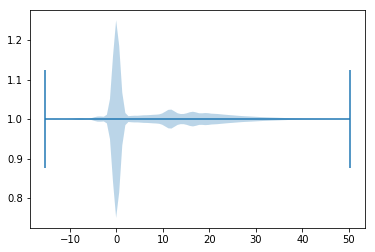

In [11]:
fig, ax = plt.subplots()
ax.violinplot(data["Reflectividad_IMR"], vert=False)